## Problem 1

Figure 1 The following data represent gage height and annual peak discharge for some
gaging station in Oklahoma. The stage is in feet and the discharge is in cubic feet per
second. The data are sequential from 1923 through 1971.
Use the data to:
1. Plot year versus stage ( x-axis is year).
2. Plot year versus discharge ( x-axis is year).
3. Plot the discharge versus stage.
4. Using the Weibull plotting position formula, determine the distribution parame-
ters that fit the data for a log-normal distribution.
5. Using the Weibull plotting position formula, determine the distribution parame-
ters that fit the data for a Gumbell distribution.
6. Using the Weibull plotting position formula, determine the distribution parame-
ters that fit the data for a Gamma distribution.
7. Estimate the discharge associated with a 25-percent chance exceedence probability
(i.e. the value that is equal to or exceeded with a 1 in 4 chance).
8. A resident claims that in the early 1900?s a flood corresponding to a stage of 30
feet occurred at the gage location. Estimate the exceedence probability (return
period) of the flow associated with this event.

## Solution(s) using ENGR-1330 methods

In [235]:
#==== Import Libraries ====#
import matplotlib.pyplot # the python plotting library
import math        # import math package
import numpy       # import numpy package
import pandas      # import pandas package
import scipy.stats # import scipy stats package
#==== Prototype Functions ====#
def weibull_sorted(sample_length):
    # generate weibull plotting positions - sample is assumed already sorted (small to large)
    weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
    for i in range(0,sample_length,1):
        weibull_pp.append((i+1)/(sample_length+1))
    return weibull_pp

def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

def antiloggit(logx):  # A prototype function to transformed log(x)
    return(math.exp(logx))

def normdist(x,mu,sigma): # A prototype function to return density from normal distribution(s)
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = 1.0 - scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

#==== Input Data ====#
database =[[1923,23,200000],
[1924,11.8,42000],
[1925,6.4,11300],
[1926,10.4,32400],
[1927,18.7,108000],
[1928,15,73000],
[1929,15.3,76500],
[1930,12.1,47800],
[1931,9.5,28200],
[1932,10.6,33700],
[1933,9.3,25700],
[1934,6.4,11700],
[1935,16,77800],
[1936,9.9,26600],
[1937,13,47500],
[1938,16.44,75600],
[1939,8.48,19200],
[1940,10.26,27800],
[1941,13.59,51000],
[1942,18.54,94000],
[1943,18.12,97200],
[1944,22.82,179000],
[1945,19.55,124000],
[1946,19.48,110000],
[1947,18.5,114000],
[1948,14.93,70200],
[1949,15.3,70700],
[1950,17.6,92800],
[1951,21.45,135000],
[1952,10.48,25800],
[1953,8.8,17500],
[1954,9.07,18700],
[1955,12.71,36300],
[1956,14.64,49200],
[1957,21.41,120000],
[1958,14.86,56800],
[1959,14.65,54800],
[1960,21.62,158000],
[1961,21.22,165000],
[1962,17.83,103000],
[1963,8.76,19700],
[1964,9,21100],
[1965,22.6,171000],
[1966,6.74,10400],
[1967,12.54,42000],
[1968,14.1,52800],
[1969,16.42,77000],
[1970,18.33,101000],
[1971,8.14,17100],
]
# extract annual peaks and stage
howmanyrows = len(database)
years=[0 for i in range(howmanyrows)]
stage=[0 for i in range(howmanyrows)]
peaks=[0 for i in range(howmanyrows)]
for i in range(howmanyrows):
    years[i]=database[i][0], #extract first entry each row of list database
    stage[i]=database[i][1] #extract second entry each row of list database
    peaks[i]=database[i][2] #extract third entry each row of list database
peaks_copy = list(peaks) # Copy the peaks list for making a rating curve later on

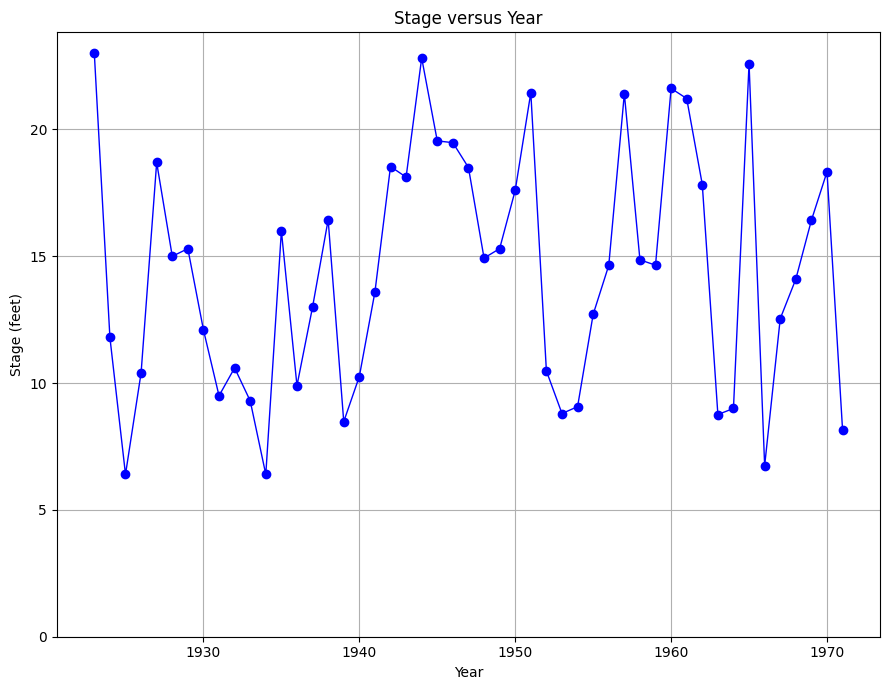

In [236]:
myfigure = matplotlib.pyplot.figure(figsize = (9,7)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.plot(years, stage ,color ='blue',marker='o',linewidth=1) 
matplotlib.pyplot.xlabel("Year") 
matplotlib.pyplot.ylabel("Stage (feet)") 
mytitle = "Stage versus Year"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.grid()  # Adjust rotation as needed
matplotlib.pyplot.ylim(bottom=0)# Set y-axis to start at zero and auto-scale upper bound
matplotlib.pyplot.tight_layout()  # Prevent label/title clipping
matplotlib.pyplot.show()

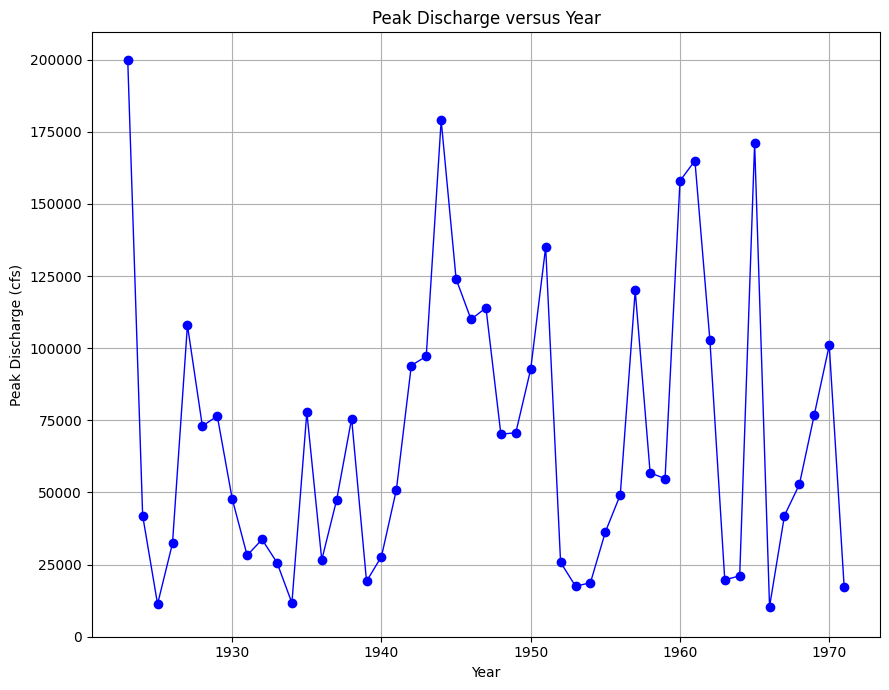

In [237]:
myfigure = matplotlib.pyplot.figure(figsize = (9,7)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.plot(years, peaks ,color ='blue',marker='o',linewidth=1) 
matplotlib.pyplot.xlabel("Year") 
matplotlib.pyplot.ylabel("Peak Discharge (cfs)") 
mytitle = "Peak Discharge versus Year"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.grid()  # Adjust rotation as needed
matplotlib.pyplot.ylim(bottom=0)# Set y-axis to start at zero and auto-scale upper bound
matplotlib.pyplot.tight_layout()  # Prevent label/title clipping
matplotlib.pyplot.show()

In [238]:
# generate plotting positions
sample_length = len(peaks)
weibull_pp = weibull_sorted(sample_length)
peaks.sort() #sort in place

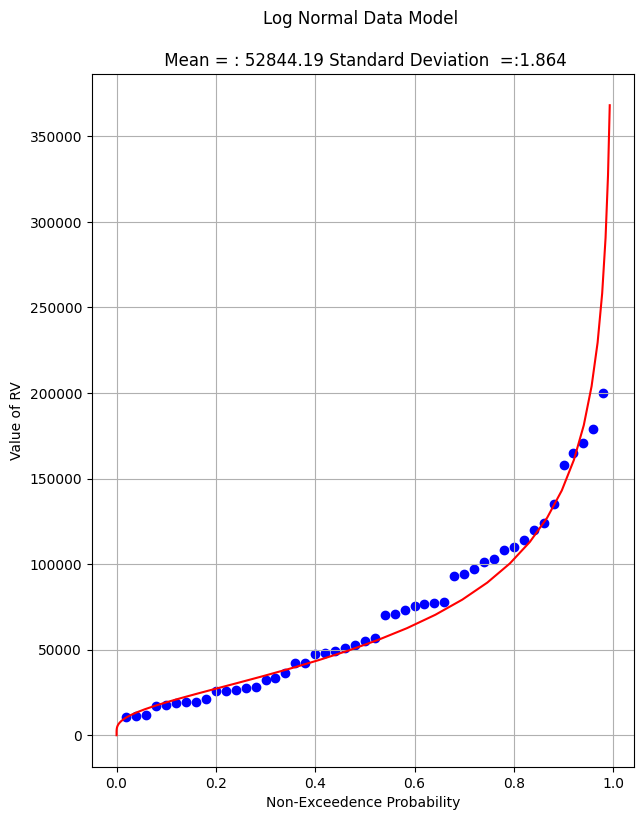

10.875102965825535 0.7890880443300708


In [239]:
# Fit and plot lognormal
peaks_array=pandas.Series(peaks)
logsample = peaks_array.apply(loggit).tolist() # put the peaks into a list
sample_mean = numpy.array(logsample).mean()
sample_variance = numpy.array(logsample).std()**2
logsample.sort() # sort the logsample in place!
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
peaks.sort() #sort in place
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, peaks ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Non-Exceedence Probability") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model \n \n Mean = : " + str(round(antiloggit(sample_mean),2))+ " Standard Deviation  =:" + str(round(antiloggit(sample_variance),3))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.grid()
matplotlib.pyplot.show()
print(mu,sigma)

In [240]:
from scipy.optimize import newton

def f(x):
    mu = 10.875102965825535
    sigma = 0.7890880443300708
    quantile = 0.75
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print("Log-Normal Fit \n 0.25 AEP (4-Year ARI) :", round(newton(f, 20000),2),"cfs")

Log-Normal Fit 
 0.25 AEP (4-Year ARI) : 89979.29 cfs


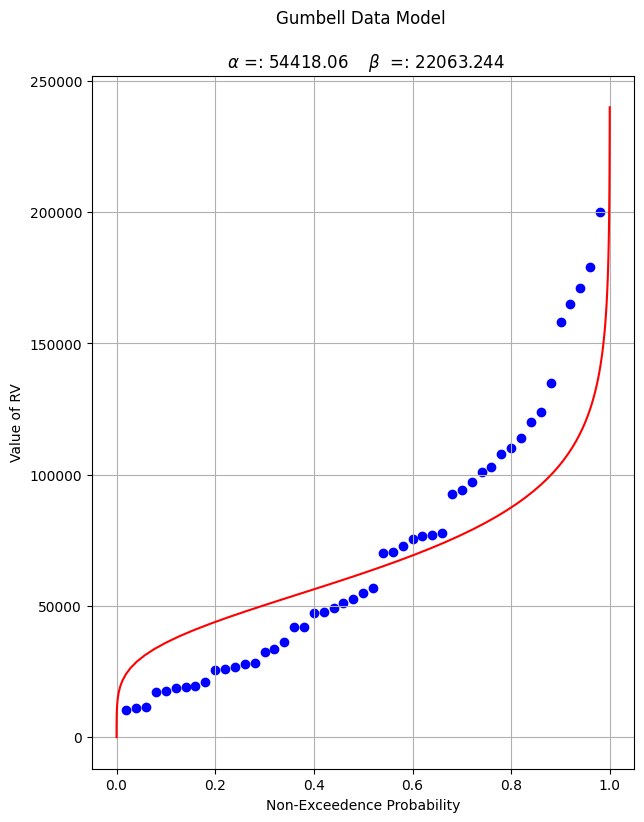

54418.063072225494 22063.243768147015


In [241]:
# Fit and plot gumbell
peaks_array=pandas.Series(peaks)
sample_mean = numpy.array(peaks_array).mean()
sample_variance = numpy.array(peaks_array).std()**2
alpha_mom = sample_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(sample_variance)*0.45
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(peaks) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
peaks.sort() #sort in place
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, peaks ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Non-Exceedence Probability") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Gumbell Data Model \n \n " + r"$\alpha$ =: " + str(round((alpha_mom),2))+ r"    $\beta$  =: " + str(round((beta_mom),3))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.grid()
matplotlib.pyplot.show()
print(alpha_mom,beta_mom)

In [242]:
from scipy.optimize import newton

def f(x):
    alpha = 54418.063072225494
    beta = 22063.243768147015
    quantile = 0.75
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print("Gumbell Fit \n 0.25 AEP (4-Year ARI) :", round(newton(f, 70000),2),"cfs")

Gumbell Fit 
 0.25 AEP (4-Year ARI) : 81906.64 cfs


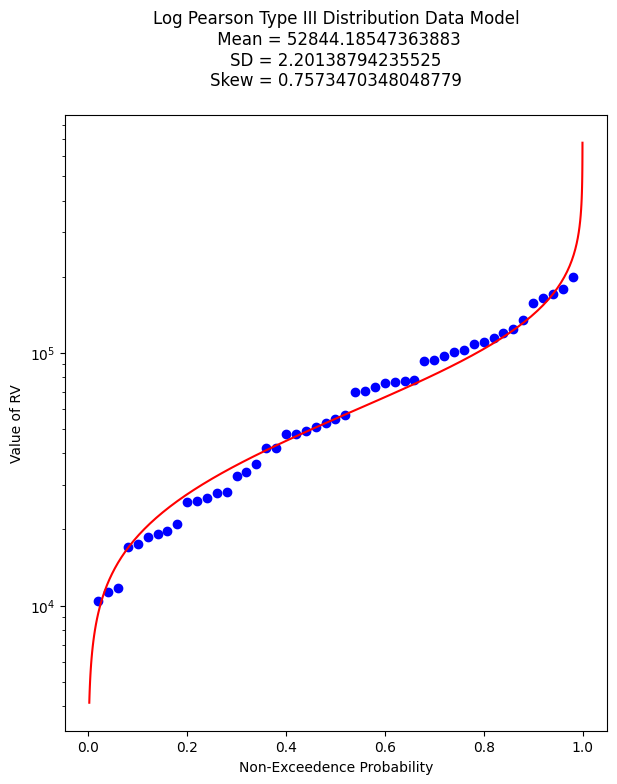

16.55334964841315 51.78185270767057 -0.10965707841014505


In [251]:
# Fit and plot Log-Pearson Type III (Gamma)
logsample = peaks_array.apply(loggit).tolist() # put the peaks into a list
sample_mean  = numpy.array(logsample).mean()
sample_stdev = numpy.array(logsample).std()
sample_skew  = scipy.stats.skew(logsample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta
#==== Build Plot Data ====
x = []; ycdf = []
xlow = (0.9*min(logsample)); xhigh = (1.1*max(logsample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 
#=== Reverse Transform x ===
for i in range(len(x)):
    x[i] = antiloggit(x[i])
#=== Plot Result(s) ===
peaks.sort()
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, peaks ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Non-Exceedence Probability") 
matplotlib.pyplot.ylabel("Value of RV") 
#matplotlib.pyplot.xscale('log')
matplotlib.pyplot.yscale('log')
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(sample_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(sample_stdev)) + "\n"
mytitle += "Skew = " + str(antiloggit(sample_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()
print(sample_tau,sample_alpha,sample_beta)

In [244]:
from scipy.optimize import newton

def f(x):
    sample_tau = 16.55334964841315
    sample_alpha = 51.78185270767057
    sample_beta = -0.10965707841014505
    quantile = 0.75
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print("Log-Pearson (Gamma) Fit \n 0.25 AEP (4-Year ARI) :", round(newton(f, 70000),2),"cfs")

Log-Pearson (Gamma) Fit 
 0.25 AEP (4-Year ARI) : 91615.5 cfs


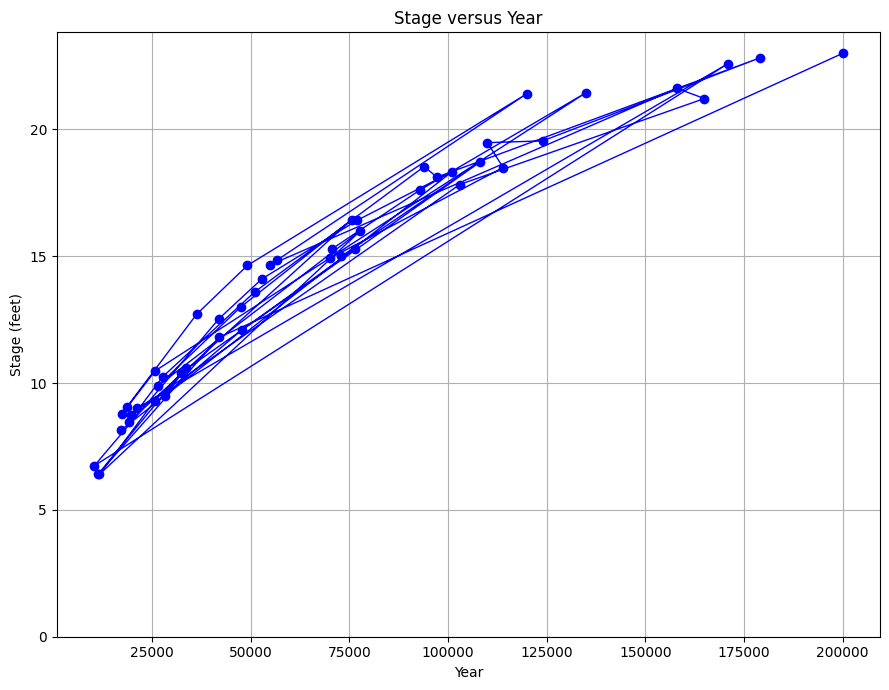

In [245]:
# Plot Stage versus Q 
myfigure = matplotlib.pyplot.figure(figsize = (9,7)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.plot(peaks_copy, stage ,color ='blue',marker='o',linewidth=1) 
matplotlib.pyplot.xlabel("Year") 
matplotlib.pyplot.ylabel("Stage (feet)") 
mytitle = "Stage versus Year"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.grid()  # Adjust rotation as needed
matplotlib.pyplot.ylim(bottom=0)# Set y-axis to start at zero and auto-scale upper bound
matplotlib.pyplot.tight_layout()  # Prevent label/title clipping
matplotlib.pyplot.show()

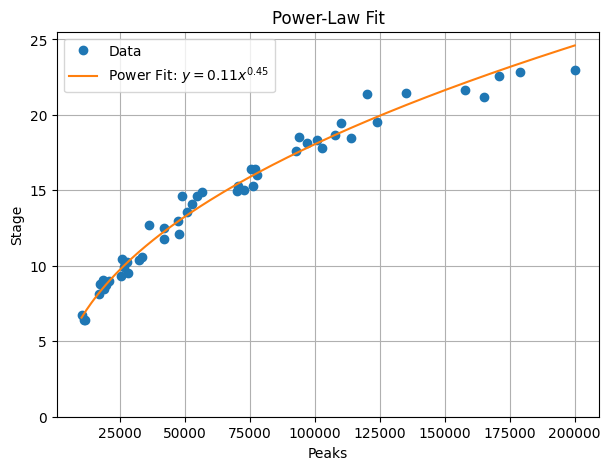

In [246]:
# Generate a rating curve Power-law should work OK

# Convert lists to arrays
x = np.array(peaks_copy)
y = np.array(stage)

# Transform to log-log space
log_x = np.log(x)
log_y = np.log(y)

# Linear fit in log space
b, log_a = np.polyfit(log_x, log_y, deg=1)
a = np.exp(log_a)

# Power-law function: y = a * x^b
y_power = a * x_fit**b

# Plot
plt.figure(figsize=(7, 5))
plt.plot(x, y, 'o', label='Data')
plt.plot(x_fit, y_power, '-', label=fr'Power Fit: $y = {a:.2f}x^{{{b:.2f}}}$')
plt.xlabel("Peaks")
plt.ylabel("Stage")
plt.title("Power-Law Fit")
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)
plt.show()

In [247]:
# Use newtons method to find Q for a given Stage
from scipy.optimize import newton

def f(x):
    stage = 30.0 #reported stage from old-timer
    constant=0.11
    exponent=0.45
    f=constant*(x**exponent)-stage
    return f

print("Estimated Discharge for Stage :", round(newton(f, 300000),0),"cfs")

Estimated Discharge for Stage : 258661.0 cfs


In [248]:
from scipy.optimize import newton

def f(x):
    sample_tau = 16.55334964841315
    sample_alpha = 51.78185270767057
    sample_beta = -0.10965707841014505
    quantile = 0.985765
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

print("Log-Pearson (Gamma) Fit \n 0.014 AEP (71.4-Year ARI) :", round(newton(f, 200000),2),"cfs")

Log-Pearson (Gamma) Fit 
 0.014 AEP (71.4-Year ARI) : 258622.37 cfs
